In [1]:
import os


input_dir = '/kaggle/input'
print(os.listdir(input_dir))


['eeg-schizo']


In [2]:
# List the contents of the 'eeg-schizo' folder
eeg_folder_path = '/kaggle/input/eeg-schizo'
print("Contents of eeg-schizo folder:", os.listdir(eeg_folder_path))


Contents of eeg-schizo folder: ['MSU']


In [3]:
# List the contents of the MSU folder
msu_folder_path = '/kaggle/input/eeg-schizo/MSU'
print("Contents of MSU folder:", os.listdir(msu_folder_path))


Contents of MSU folder: ['schizophrenic', 'healthy']


In [4]:
import os
import numpy as np
import mne
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


dataset_path = '/kaggle/input/eeg-schizo/MSU'


def bandpass_filter(raw, l_freq=1.0, h_freq=40.0):
    return raw.filter(l_freq=l_freq, h_freq=h_freq, fir_design='firwin')


def segment_data(eeg_data, window_size, overlap):
    step = int(window_size * (1 - overlap))  # Calculate step size
    windows = []
    for start in range(0, len(eeg_data) - window_size + 1, step):
        windows.append(eeg_data[start:start + window_size])
    return np.array(windows)

# Feature extraction (mean, standard deviation, and spectral entropy)
def extract_features(eeg_data, sfreq):
    # Mean and standard deviation across channels
    mean_features = np.mean(eeg_data, axis=0)
    std_features = np.std(eeg_data, axis=0)

    # Spectral entropy
    psd, _ = mne.time_frequency.psd_array_multitaper(eeg_data.T, sfreq=sfreq, fmin=1, fmax=40, verbose=False)
    psd_norm = psd / np.sum(psd, axis=0, keepdims=True)
    spectral_entropy = -np.sum(psd_norm * np.log(psd_norm), axis=0)

    return np.concatenate([mean_features, std_features, spectral_entropy])

# Function to load and preprocess .edf files
def load_preprocessed_data(folder_path, label, sfreq, window_size, overlap):
    data = []
    labels = []
    for file in os.listdir(folder_path):
        if file.endswith('.edf'):
            file_path = os.path.join(folder_path, file)
            raw = mne.io.read_raw_edf(file_path, preload=True)
            raw.pick_types(eeg=True)  

            # Bandpass filter
            raw = bandpass_filter(raw)

            # Get EEG data
            eeg_data = raw.get_data().T  

            # Segment data into windows
            windows = segment_data(eeg_data, window_size, overlap)

            # Extract features for each window
            features = [extract_features(window, sfreq) for window in windows]
            data.extend(features)
            labels.extend([label] * len(features))
    return np.array(data), np.array(labels)

# Parameters for preprocessing
sampling_frequency = 128  
window_size = int(2 * sampling_frequency)  # 2 seconds window
overlap = 0.55  # 55% overlap

# Load and preprocess data
healthy_path = os.path.join(dataset_path, 'healthy')
schizophrenic_path = os.path.join(dataset_path, 'schizophrenic')

healthy_data, healthy_labels = load_preprocessed_data(healthy_path, label=0, sfreq=sampling_frequency,
                                                      window_size=window_size, overlap=overlap)
schizophrenic_data, schizophrenic_labels = load_preprocessed_data(schizophrenic_path, label=1, sfreq=sampling_frequency,
                                                                  window_size=window_size, overlap=overlap)

# Combine the data
X = np.concatenate([healthy_data, schizophrenic_data], axis=0)
y = np.concatenate([healthy_labels, schizophrenic_labels], axis=0)

# Normalize each sample
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 241249  =      0.000 ...   964.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 278749  =      0.000 ...  1114.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 216249  =      0.000 ...   864.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 224999  =      0.000 ...   899.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 236249  =      0.000 ...   944.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 228749  =      0.000 ...   914.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 232499  =      0.000 ...   929.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227749  =      0.000 ...   910.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 184999  =      0.000 ...   739.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 296249  =      0.000 ...  1184.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 222499  =      0.000 ...   889.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 336499  =      0.000 ...  1345.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 542499  =      0.000 ...  2169.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 283749  =      0.000 ...  1134.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 339999  =      0.000 ...  1359.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240999  =      0.000 ...   963.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 271749  =      0.000 ...  1086.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Reshape for CNN input 
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (50159, 117, 1), Test shape: (12540, 117, 1)


In [7]:
# Import necessary libraries
import argparse
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, GRU, Dense, Flatten, Reshape, Dropout, Layer, Activation, Add, Input
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import PReLU, GlobalAveragePooling2D, GlobalMaxPooling2D, Multiply

class ChannelAttention(Layer):
    def __init__(self, filters, reduction_ratio=16, **kwargs):
        super(ChannelAttention, self).__init__(**kwargs)
        self.filters = filters
        self.reduction_ratio = reduction_ratio

        # Layers for the attention mechanism
        self.global_avg_pool = GlobalAveragePooling2D()
        self.global_max_pool = GlobalMaxPooling2D()
        self.dense1 = Dense(filters // reduction_ratio, activation='relu')
        self.dense2 = Dense(filters, activation='sigmoid')

    def call(self, inputs):
        # Global Average Pooling
        avg_pool = self.global_avg_pool(inputs)
        avg_pool = self.dense1(avg_pool)
        avg_pool = self.dense2(avg_pool)

        # Global Max Pooling
        max_pool = self.global_max_pool(inputs)
        max_pool = self.dense1(max_pool)
        max_pool = self.dense2(max_pool)

        # Combine both pathways
        combined = Add()([avg_pool, max_pool])
        combined = tf.expand_dims(combined, axis=1)  # Add spatial dimensions
        combined = tf.expand_dims(combined, axis=2)

        # Apply the attention mechanism
        return Multiply()([inputs, combined])

    def get_config(self):
        config = super(ChannelAttention, self).get_config()
        config.update({
            "filters": self.filters,
            "reduction_ratio": self.reduction_ratio
        })
        return config


from keras.layers import Lambda
import tensorflow as tf


from keras.layers import Bidirectional

class ProposedModelFramework:
    def __init__(self, classes, input_shape):
        self.classes = classes
        self.input_shape = input_shape
        self.model = Sequential()

        
        reshaped_input_shape = (input_shape[0], 1, input_shape[1])

        # CNN layers with increased filters using PReLU
        self.model.add(Conv2D(filters=128, kernel_size=(3, 1), input_shape=reshaped_input_shape))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, kernel_size=(3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, kernel_size=(3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, kernel_size=(3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D(pool_size=(2, 1)))

        # Flatten layer to prepare for LSTM
        self.model.add(Flatten())
        # Reshape to fit LSTM input shape
        self.model.add(Reshape((-1, 128)))

        # Bidirectional LSTM layer
        self.model.add(Bidirectional(LSTM(units=256, return_sequences=True, activation='tanh')))

        # Bidirectional GRU layer
        self.model.add(Bidirectional(GRU(units=256, return_sequences=True)))

        # Reshape before Channel Attention to add a channel dimension
        self.model.add(Reshape((-1, 1, 256)))

        # Channel Attention Layer
        self.model.add(ChannelAttention(filters=256))

        # Reshape after Channel Attention back to 3D
        self.model.add(Reshape((-1, 256)))

        # Flatten after Channel Attention
        self.model.add(Flatten())

        # Dense layers with increased units using PReLU
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(256))
        self.model.add(PReLU())

        # Dropout for regularization
        self.model.add(Dropout(0.5))

        # Final Classification Layer
        self.model.add(Dense(1, activation='sigmoid'))

    def train(self, X_train, y_train, epochs, batch_size, validation_split):
        # Compile the model
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Early Stopping and Learning Rate Scheduler
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

        # Train the model
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                 validation_split=validation_split, callbacks=[early_stopping, lr_scheduler])
        return history

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def display_summary(self):
        print("\nModel Summary:")
        self.model.summary()

# Example usage

input_shape = (X_train.shape[1], X_train.shape[2])  
model = ProposedModelFramework(classes=2, input_shape=input_shape)
model.display_summary()



Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 115, 1, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_8 (PReLU)               │ (None, 115, 1, 128)    │        14,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 113, 1, 128)    │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_9 (PReLU)               │ (None, 113, 1, 128)    │        14,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 111, 1, 128)    │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_10 (PReLU)              │ (None, 111, 1, 128)    │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 1, 128)    │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_11 (PReLU)              │ (None, 109, 1, 128)    │        13,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6912)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 54, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 54, 512)        │       788,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 54, 512)        │     1,182,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 108, 1, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ channel_attention_1             │ (None, 108, 1, 256)    │         8,464 │
│ (ChannelAttention)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 108, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 27648)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     3,539,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_12 (PReLU)              │ (None, 128)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_13 (PReLU)              │ (None, 128)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_14 (PReLU)              │ (None, 128)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,791,377 (22.09 MB)

 Trainable params: 5,791,377 (22.09 MB)

 Non-trainable params: 0 (0.00 B)

Fold 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7503 - loss: 0.4845 - val_accuracy: 0.9512 - val_loss: 0.1307 - learning_rate: 0.0010
Epoch 2/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9494 - loss: 0.1331 - val_accuracy: 0.9671 - val_loss: 0.0897 - learning_rate: 0.0010
Epoch 3/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9668 - loss: 0.0918 - val_accuracy: 0.9715 - val_loss: 0.0729 - learning_rate: 0.0010
Epoch 4/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9746 - loss: 0.0724 - val_accuracy: 0.9735 - val_loss: 0.0751 - learning_rate: 0.0010
Epoch 5/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9762 - loss: 0.0653 - val_accuracy: 0.9786 - val_loss: 0.0678 - learning_rate: 0.0010
Epoch 6/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9791 - loss: 0.0538 - val_accuracy: 0.9769 - val_loss: 0.0644 - learning_rate: 0.0010
Epoch 7/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9

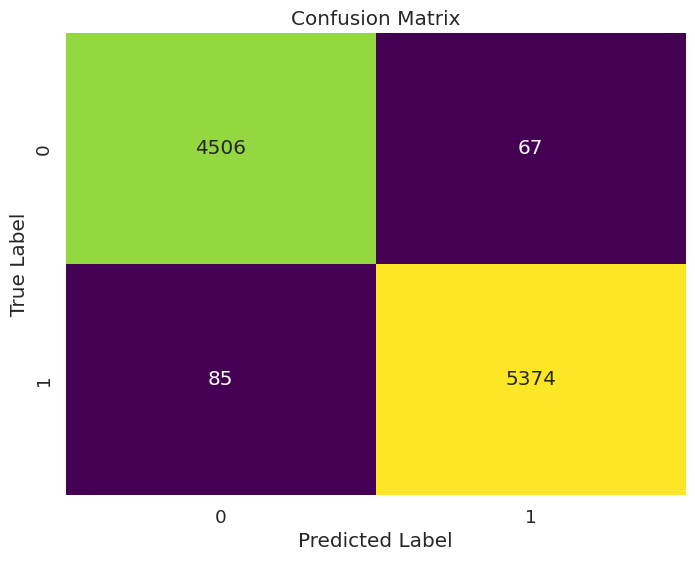

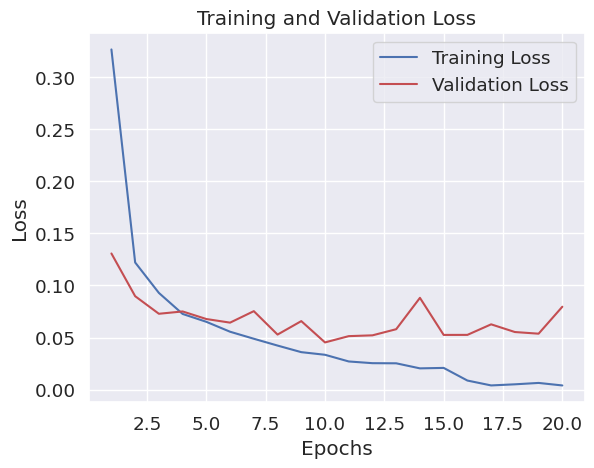

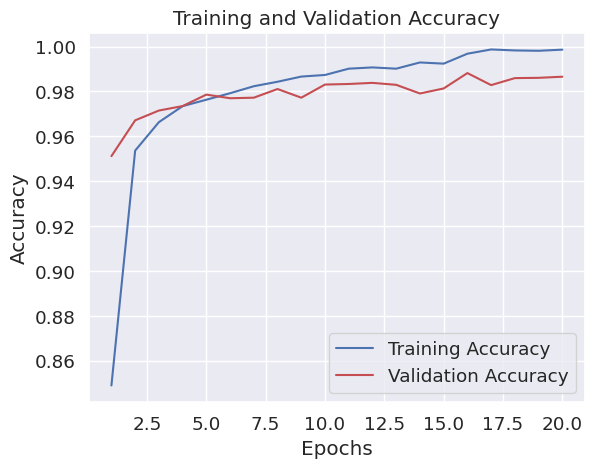

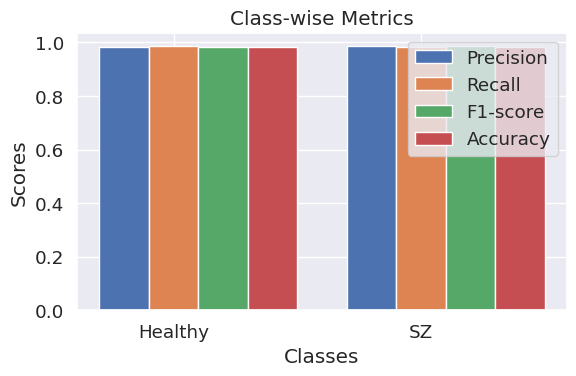

Training Accuracy: 99.86%
Validation Accuracy: 98.65%
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9824 - loss: 0.0519
Testing Accuracy: 98.35%
Precision: 98.82%
Recall: 98.21%
F1-Score: 98.51%


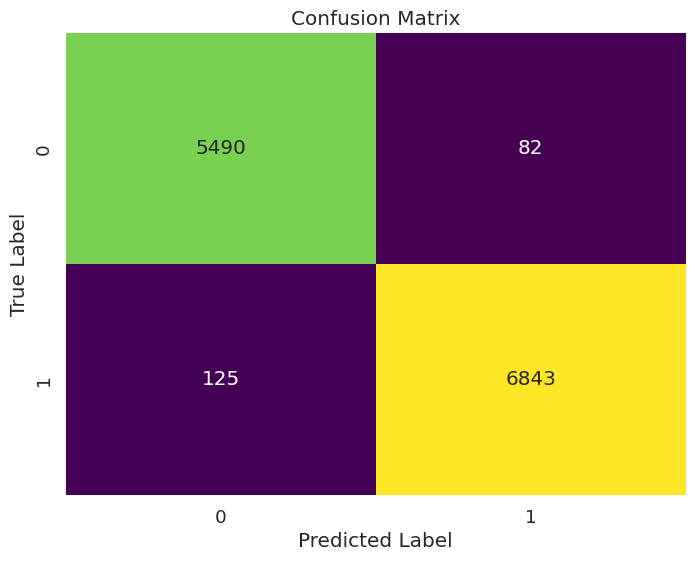

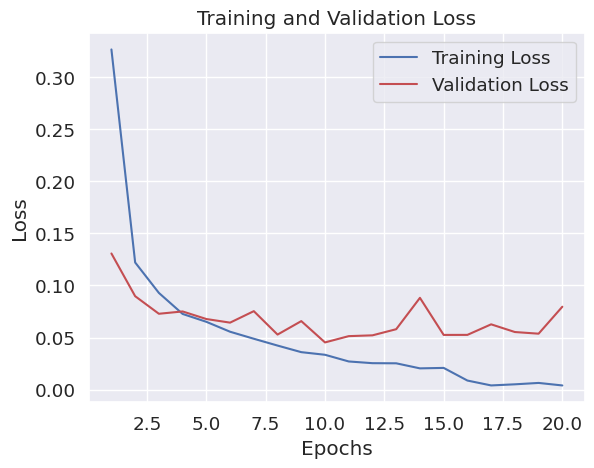

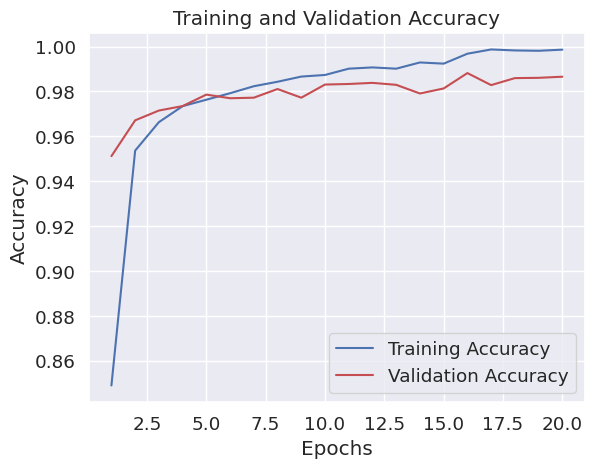

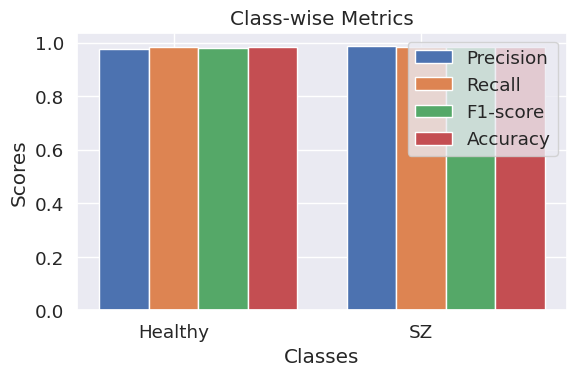

Fold 2/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.7440 - loss: 0.4915 - val_accuracy: 0.9451 - val_loss: 0.1376 - learning_rate: 0.0010
Epoch 2/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9498 - loss: 0.1292 - val_accuracy: 0.9606 - val_loss: 0.1231 - learning_rate: 0.0010
Epoch 3/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9640 - loss: 0.0986 - val_accuracy: 0.9695 - val_loss: 0.0841 - learning_rate: 0.0010
Epoch 4/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9735 - loss: 0.0749 - val_accuracy: 0.9356 - val_loss: 0.1652 - learning_rate: 0.0010
Epoch 5/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9750 - loss: 0.0697 - val_accuracy: 0.9735 - val_loss: 0.0767 - learning_rate: 0.0010
Epoch 6/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9797 - loss: 0.0543 - val_accuracy: 0.9717 - val_loss: 0.0776 - learning_rate: 0.0010
Epoch 7/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9

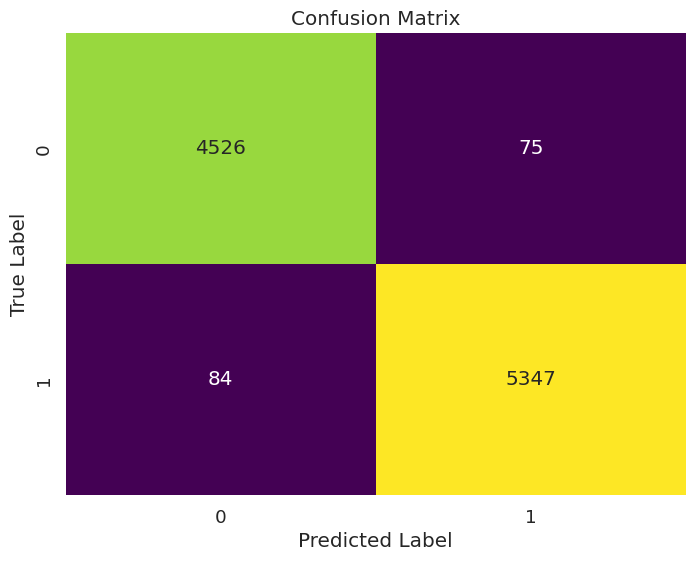

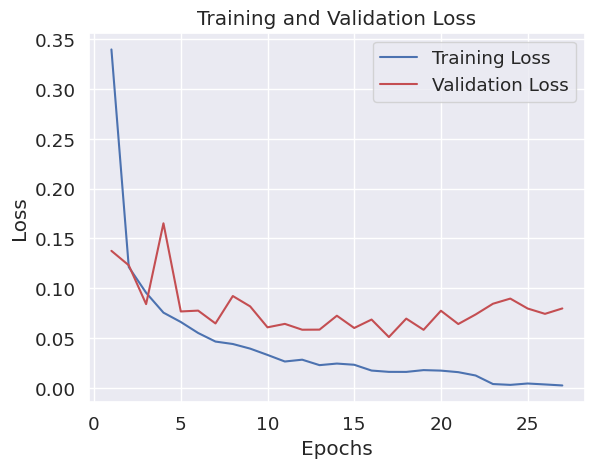

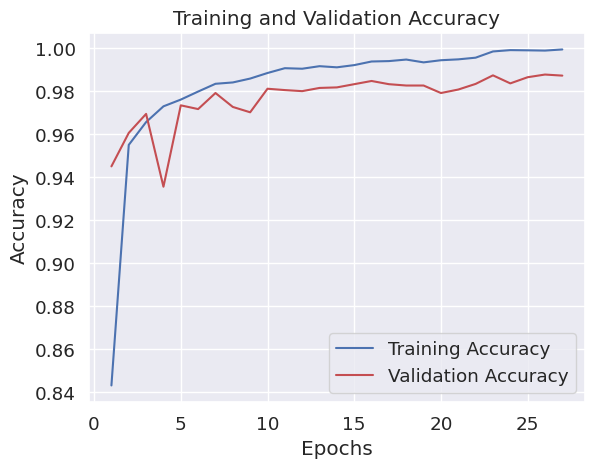

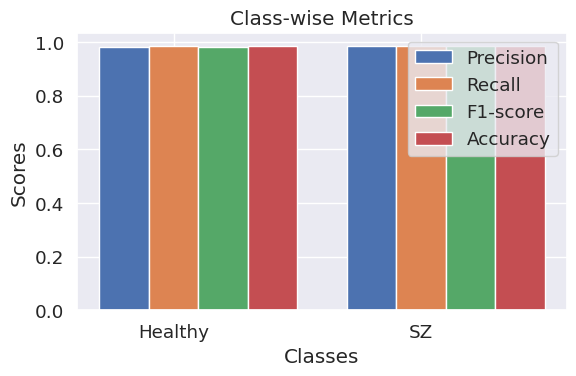

Training Accuracy: 99.95%
Validation Accuracy: 98.73%
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9830 - loss: 0.0486
Testing Accuracy: 98.29%
Precision: 98.62%
Recall: 98.31%
F1-Score: 98.46%


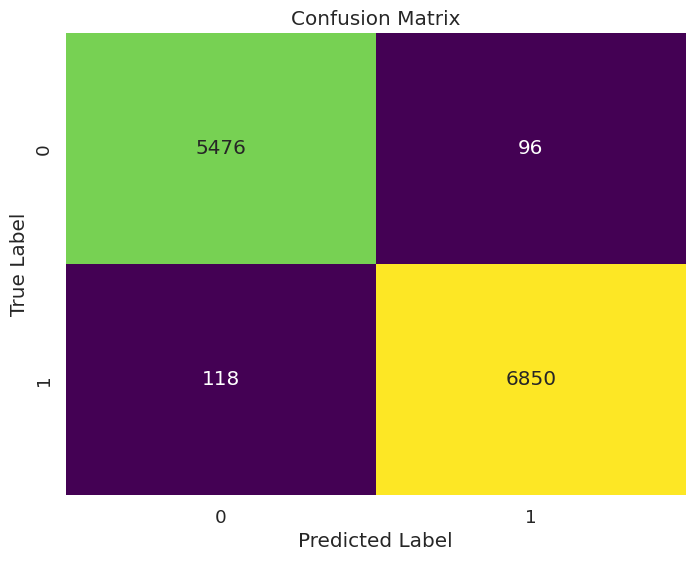

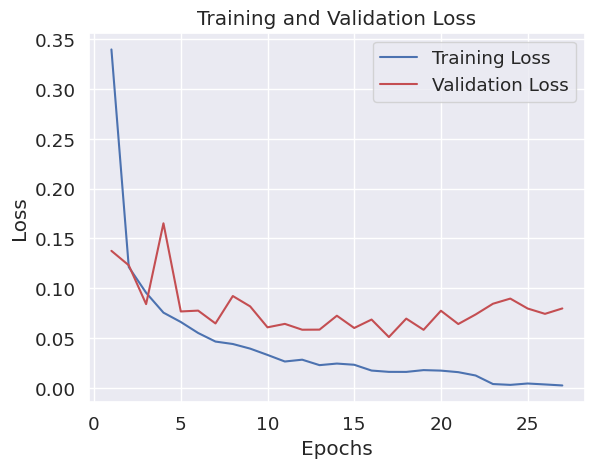

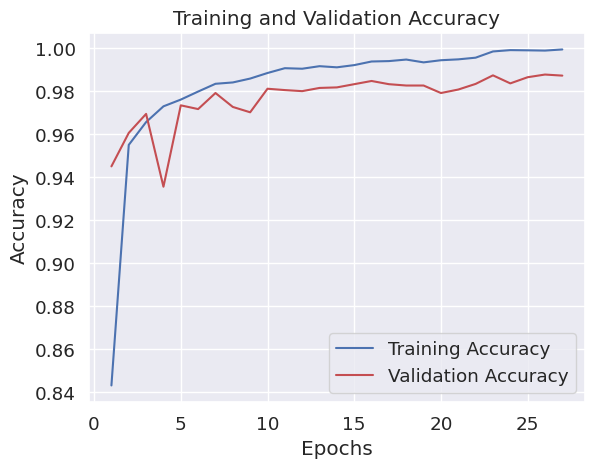

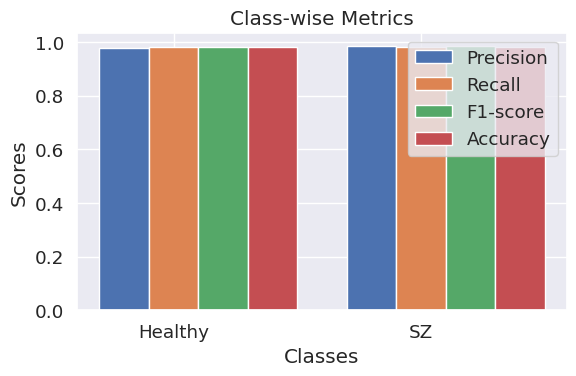

Fold 3/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.7495 - loss: 0.4812 - val_accuracy: 0.9294 - val_loss: 0.1711 - learning_rate: 0.0010
Epoch 2/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9457 - loss: 0.1430 - val_accuracy: 0.9559 - val_loss: 0.1168 - learning_rate: 0.0010
Epoch 3/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9621 - loss: 0.1020 - val_accuracy: 0.9616 - val_loss: 0.0961 - learning_rate: 0.0010
Epoch 4/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9729 - loss: 0.0754 - val_accuracy: 0.9713 - val_loss: 0.0755 - learning_rate: 0.0010
Epoch 5/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9778 - loss: 0.0625 - val_accuracy: 0.9758 - val_loss: 0.0659 - learning_rate: 0.0010
Epoch 6/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9778 - loss: 0.0591 - val_accuracy: 0.9727 - val_loss: 0.0684 - learning_rate: 0.0010
Epoch 7/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9

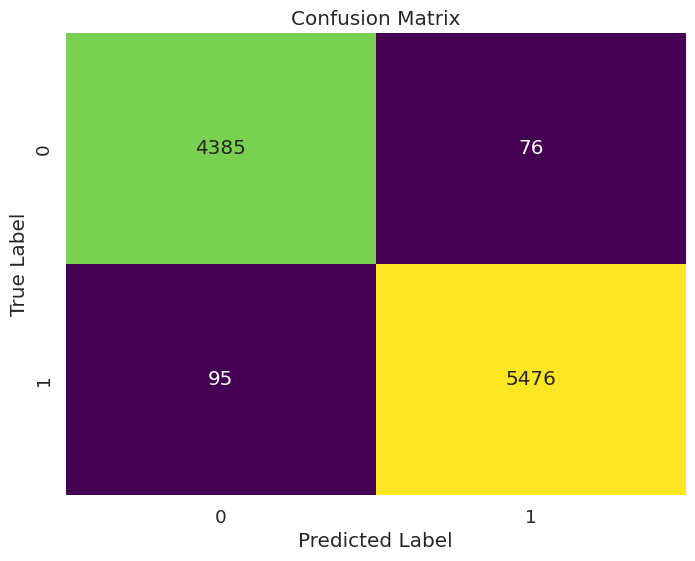

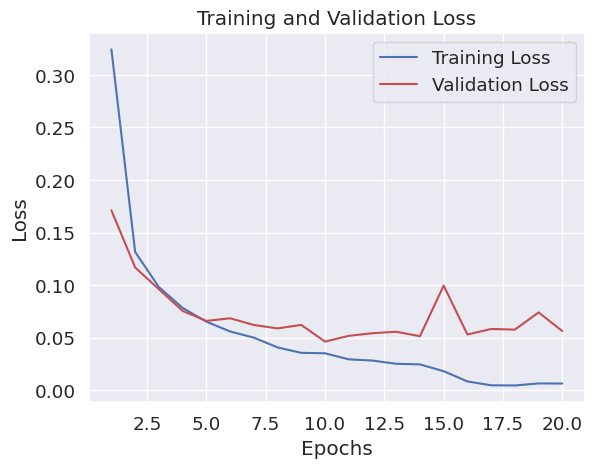

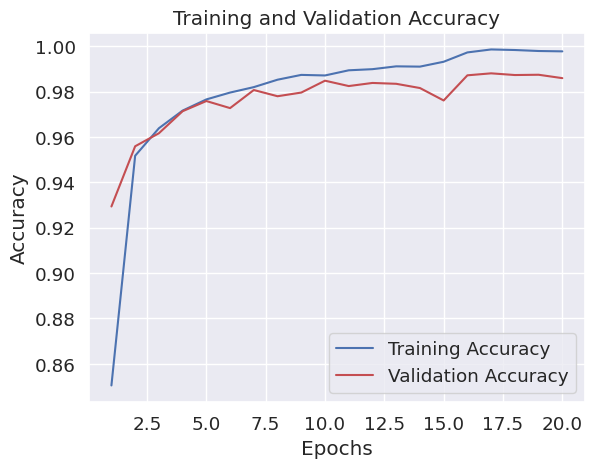

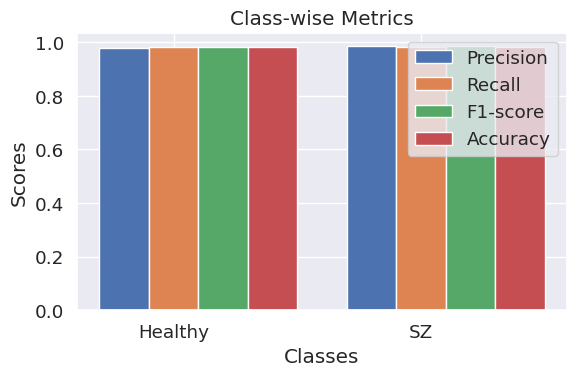

Training Accuracy: 99.77%
Validation Accuracy: 98.59%
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9819 - loss: 0.0487
Testing Accuracy: 98.13%
Precision: 98.20%
Recall: 98.45%
F1-Score: 98.32%


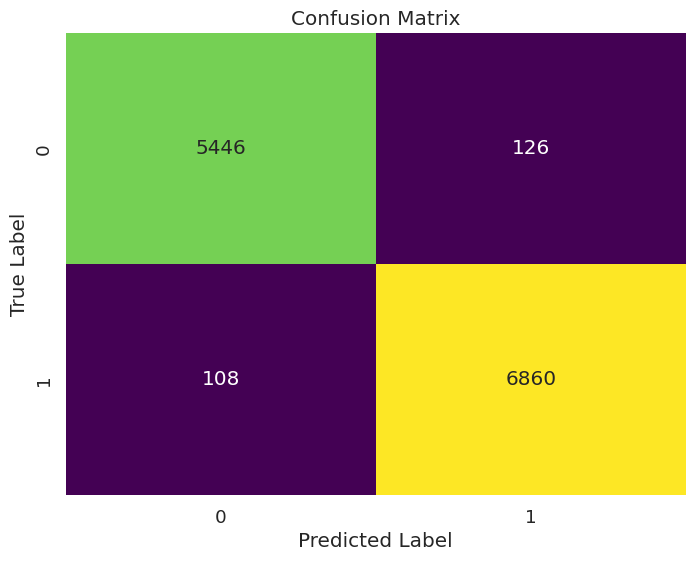

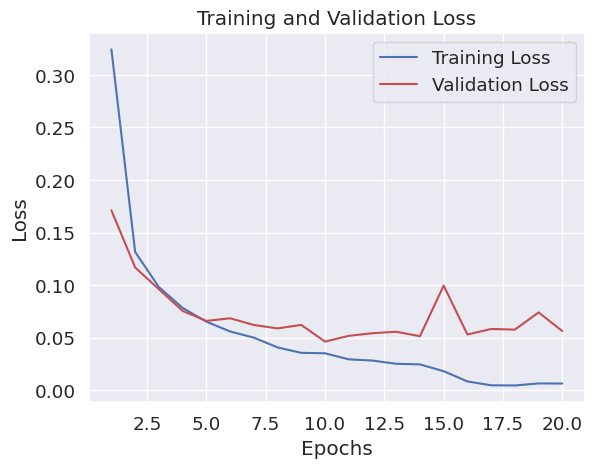

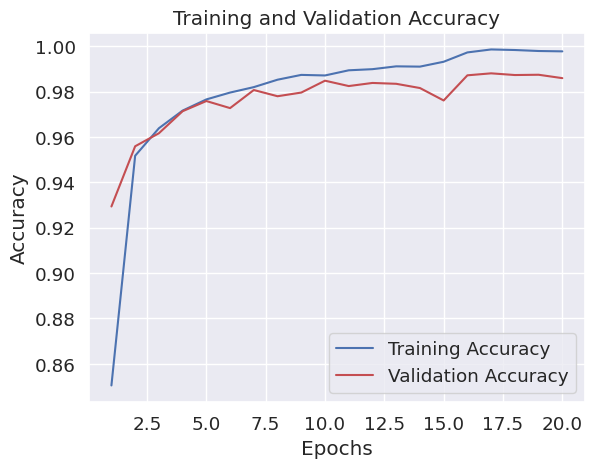

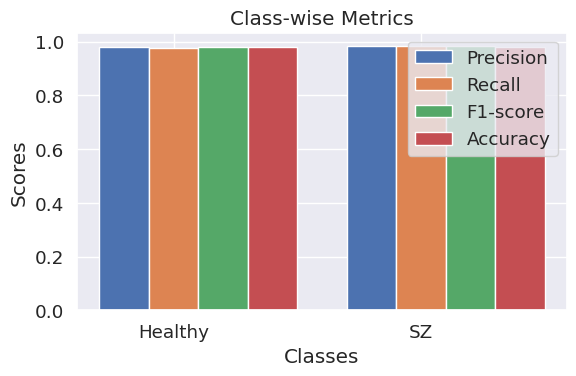

Fold 4/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.7487 - loss: 0.4728 - val_accuracy: 0.9502 - val_loss: 0.1332 - learning_rate: 0.0010
Epoch 2/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9499 - loss: 0.1369 - val_accuracy: 0.9550 - val_loss: 0.1118 - learning_rate: 0.0010
Epoch 3/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9653 - loss: 0.0945 - val_accuracy: 0.9621 - val_loss: 0.1033 - learning_rate: 0.0010
Epoch 4/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9696 - loss: 0.0825 - val_accuracy: 0.9738 - val_loss: 0.0807 - learning_rate: 0.0010
Epoch 5/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9781 - loss: 0.0636 - val_accuracy: 0.9767 - val_loss: 0.0673 - learning_rate: 0.0010
Epoch 6/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9805 - loss: 0.0543 - val_accuracy: 0.9768 - val_loss: 0.0692 - learning_rate: 0.0010
Epoch 7/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9

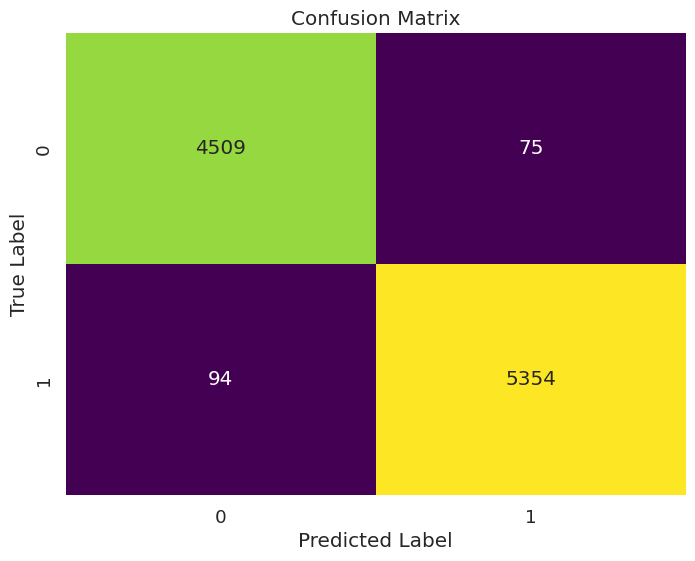

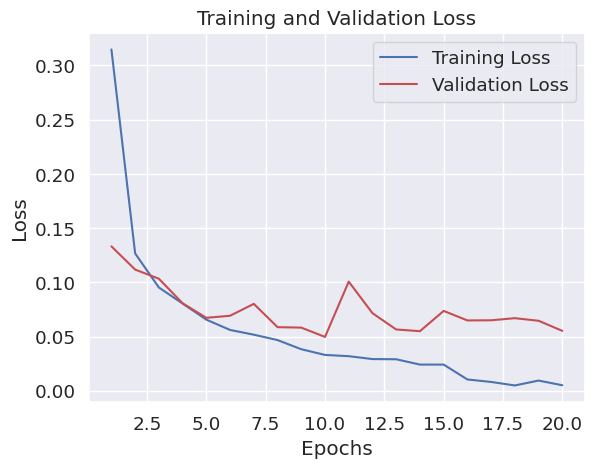

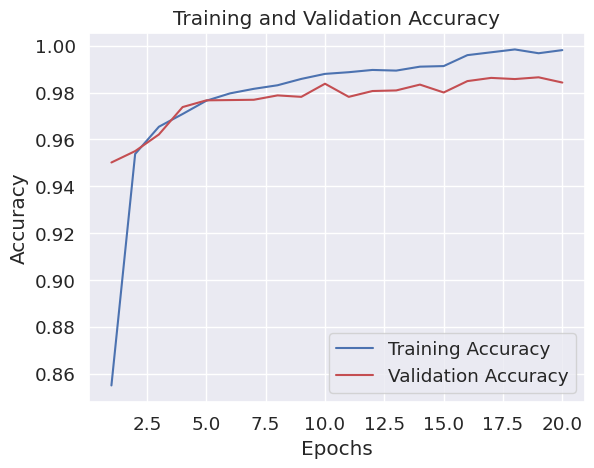

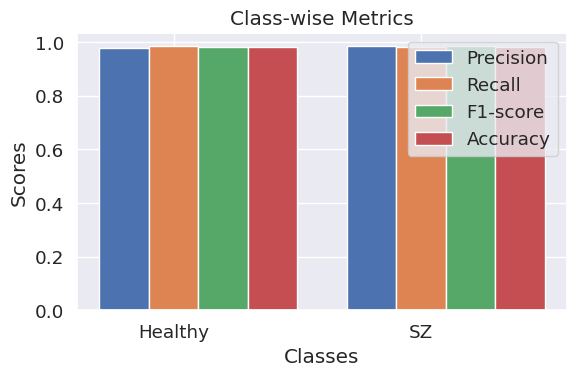

Training Accuracy: 99.82%
Validation Accuracy: 98.43%
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9807 - loss: 0.0530
Testing Accuracy: 98.12%
Precision: 98.49%
Recall: 98.12%
F1-Score: 98.30%


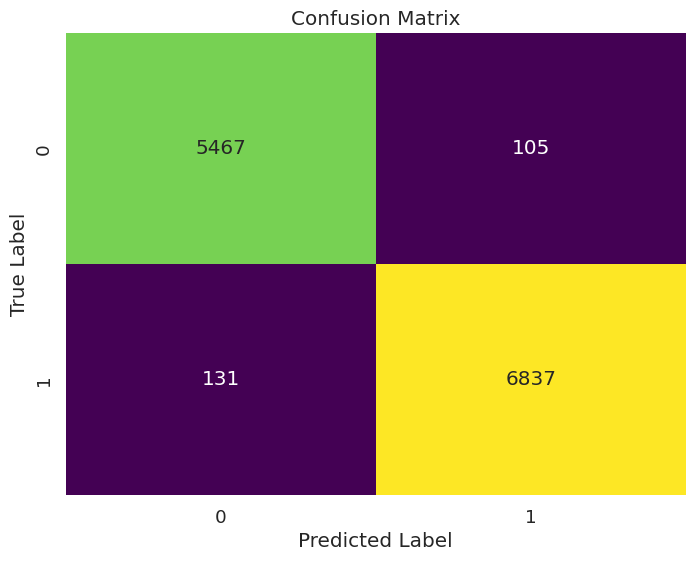

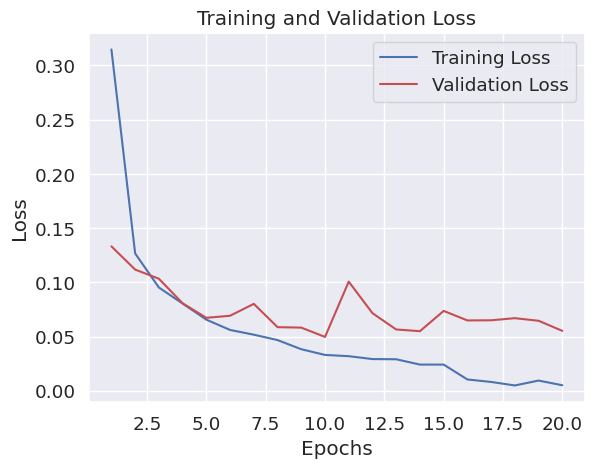

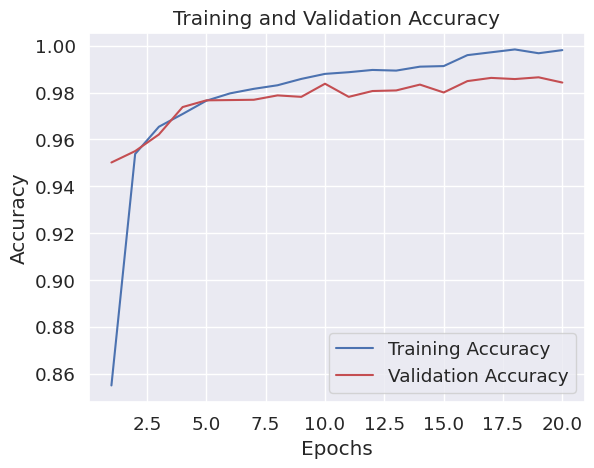

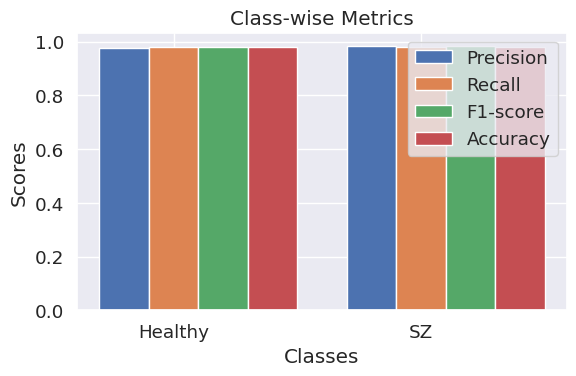

Fold 5/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7656 - loss: 0.4657 - val_accuracy: 0.9396 - val_loss: 0.1540 - learning_rate: 0.0010
Epoch 2/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9494 - loss: 0.1339 - val_accuracy: 0.9682 - val_loss: 0.1027 - learning_rate: 0.0010
Epoch 3/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9674 - loss: 0.0899 - val_accuracy: 0.9717 - val_loss: 0.0869 - learning_rate: 0.0010
Epoch 4/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9720 - loss: 0.0770 - val_accuracy: 0.9679 - val_loss: 0.0865 - learning_rate: 0.0010
Epoch 5/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9748 - loss: 0.0690 - val_accuracy: 0.9722 - val_loss: 0.0779 - learning_rate: 0.0010
Epoch 6/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9791 - loss: 0.0594 - val_accuracy: 0.9706 - val_loss: 0.0881 - learning_rate: 0.0010
Epoch 7/100
502/502 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9

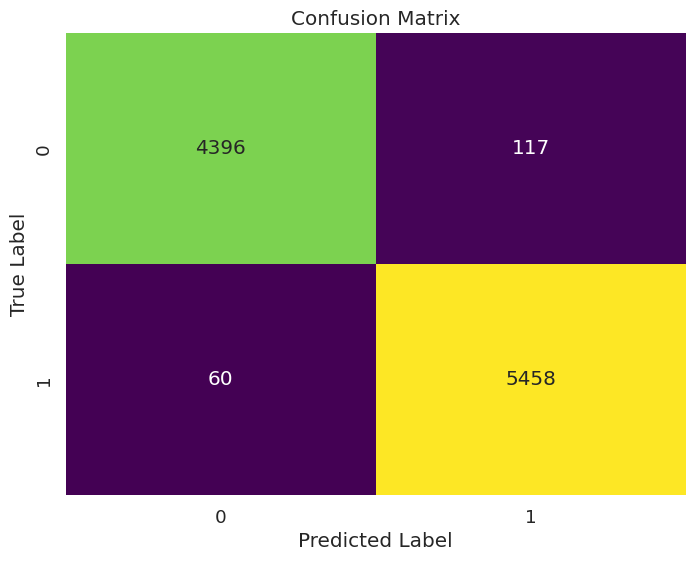

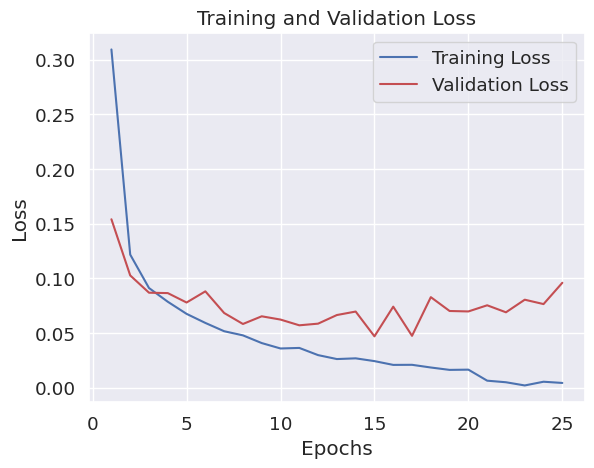

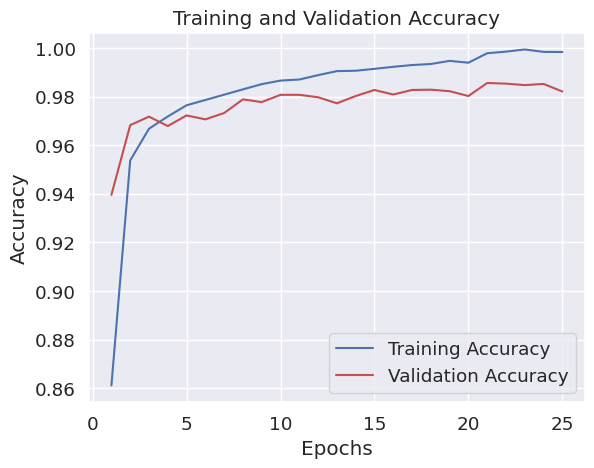

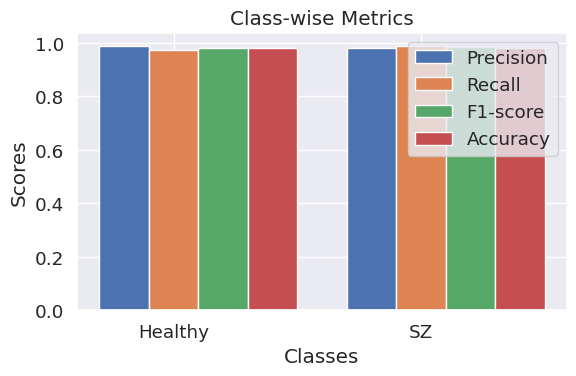

Training Accuracy: 99.83%
Validation Accuracy: 98.21%
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9822 - loss: 0.0489
Testing Accuracy: 98.18%
Precision: 97.68%
Recall: 99.08%
F1-Score: 98.38%


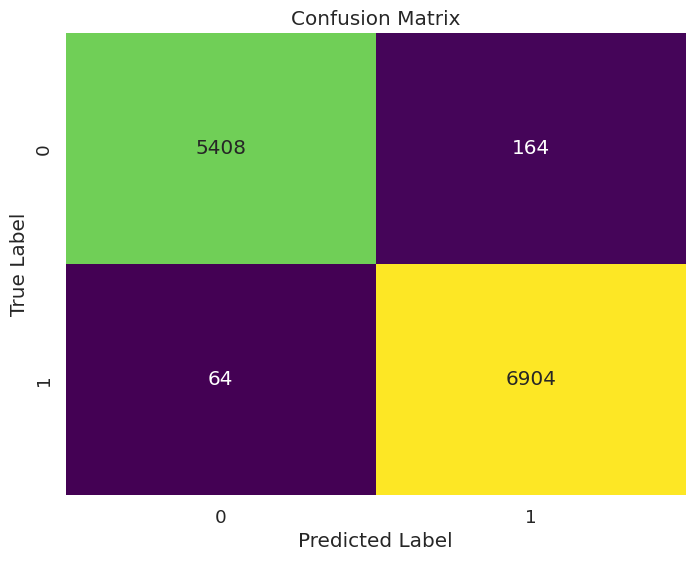

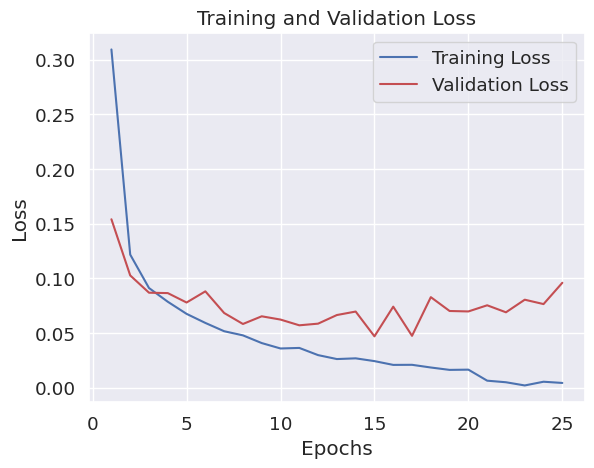

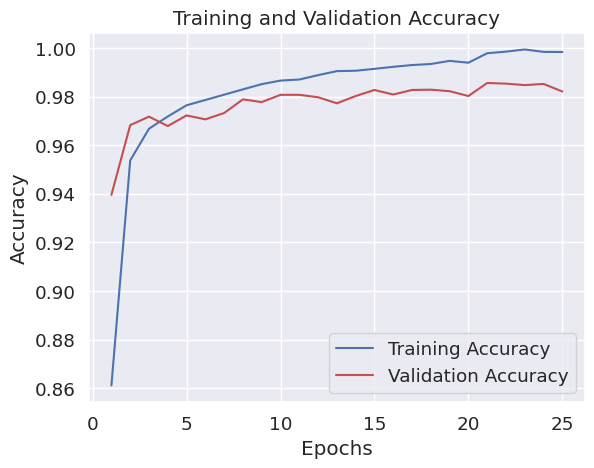

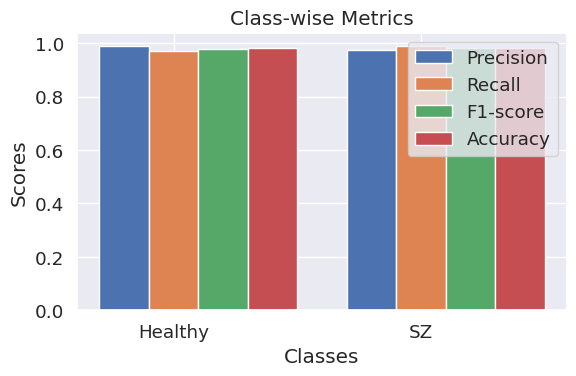

In [7]:
def plot_class_wise_metric(classes,y_test,y_pred_classes):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)
    accuracy = accuracy_score(y_test, y_pred_classes)
    class_labels=[]

    # Define class labels

    class_labels=['Healthy','SZ']


    # Define metrics to plot
    metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    classwise_metrics = [precision, recall, f1_score, [accuracy]*len(precision)]

    # Plot bar graph
    fig, ax = plt.subplots(figsize=(6, 4))

    index = np.arange(len(class_labels))
    bar_width = 0.2
    opacity = 0.8

    for i, metric in enumerate(metrics):
        ax.bar(index + i * bar_width, classwise_metrics[i], bar_width, label=metric)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Class-wise Metrics')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_labels)
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'{classes}_class_bargraph.png')
    plt.show()

def plot_loss_curve(history, classes):

    # Access loss and accuracy from training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

   # Plot loss vs epoch
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'{classes}_class_loss curve.png')
    plt.show()

# Plot accuracy vs epoch
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'{classes}_class_accuracy.png')
    plt.show()



def plot_confusion_matrix(y_test, y_pred_classes):
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set_theme(font_scale=1.2) 
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



def metric_values(model,y_pred_classes,X_test,y_test):
    accuracy = model.evaluate(X_test,y_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
    print("Accuracy:", accuracy*100,"%")
    print("Precision:", precision*100,"%")
    print("Recall:", recall*100,"%")
    print("F1-score:", f1_score*100,"%")

# Cross-validation function
def cross_validate(X, y, input_shape, epochs=100, batch_size=64, n_splits=5):  
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)  
    fold = 1

    for train_idx, val_idx in kfold.split(X):
        print(f"Fold {fold}/{n_splits}")

        # Split data
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Normalize data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
        X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)

        # Create and train the model
        model = ProposedModelFramework(2, input_shape)
        history = model.train(X_train, y_train, epochs, batch_size, validation_split=0.2)

        # Evaluate on the validation set
        y_pred = model.predict(X_val)
        y_pred_classes = (y_pred > 0.5).astype(int).flatten()

        # Metrics and plots for each fold
        plot_confusion_matrix(y_val, y_pred_classes)
        plot_loss_curve(history, f"Fold_{fold}")
        plot_class_wise_metric(f"Fold_{fold}", y_val, y_pred_classes)

        # Training and validation accuracy from history
        train_accuracy = history.history['accuracy'][-1]  
        val_accuracy = history.history['val_accuracy'][-1]  

        print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
        print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

        # Evaluate the model
        y_pred = model.predict(X_test)
        y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

        # Evaluate on the test set
        test_loss, test_accuracy = model.evaluate(X_test, y_test)

        print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
        # Calculate precision, recall, and F1-score


        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')

        print(f"Precision: {precision * 100:.2f}%")
        print(f"Recall: {recall * 100:.2f}%")
        print(f"F1-Score: {f1_score * 100:.2f}%")

        # Plot
        plot_confusion_matrix(y_test, y_pred_classes)
        plot_loss_curve(history, "Healthy vs Schizophrenic")
        plot_class_wise_metric("Healthy vs Schizophrenic", y_test, y_pred_classes)

        fold += 1


input_shape = (X_train.shape[1], X_train.shape[2])
epochs = 100
batch_size = 64

# Perform 5-fold cross-validation
cross_validate(X_train, y_train, input_shape, epochs, batch_size)  
